In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy import linalg as la

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import cartopy.crs as crs
import cartopy.feature as cfeature

In [18]:
#pip list

In [19]:
#Set linux path to the aq file and concatenate the path and string

filename = '../data/hourly_88101_PM25_2020.csv'
#Read in data with  pandas read_csv function. Only read in specific columns of this data set as given by
aq_dat= pd.read_csv(filename,sep=",",usecols=['State Code','County Code','Site Num','Latitude','Longitude','Date GMT','Time GMT','Sample Measurement'],parse_dates=[['Date GMT', 'Time GMT']])
display(aq_dat)

Date GMT_Time GMT  State Code  County Code  Site Num   Latitude  \
0       2020-01-01 06:00:00           1           73        23  33.553056   
1       2020-01-01 07:00:00           1           73        23  33.553056   
2       2020-01-01 08:00:00           1           73        23  33.553056   
3       2020-01-01 09:00:00           1           73        23  33.553056   
4       2020-01-01 10:00:00           1           73        23  33.553056   
...                     ...         ...          ...       ...        ...   
5732893 2021-01-01 03:00:00          80            2        14  32.633671   
5732894 2021-01-01 04:00:00          80            2        14  32.633671   
5732895 2021-01-01 05:00:00          80            2        14  32.633671   
5732896 2021-01-01 06:00:00          80            2        14  32.633671   
5732897 2021-01-01 07:00:00          80            2        14  32.633671   

          Longitude  Sample Measurement  
0        -86.815000                 3.3  
1        -86.815000                 4.8  
2        -86.815000                 4.2  
3        -86.815000                 4.5  
4        -86.815000                 6.5  
...             ...                 ...  
5732893 -115.504995                47.0  
5732894 -115.504995               133.0  
5732895 -115.504995                65.0  
5732896 -115.504995                92.0  
5732897 -115.504995               133.0  

[5732898 rows x 7 columns]

In [20]:
#let's simplify the data.
#1. create a new dataframe named aq_utah with data only in utah
#new_dataframe = original_frame[original_frame['appropriate column']==49]

#answer #1
aq_utah = aq_dat[aq_dat['State Code']==49]

#create a station ID using the County and Site columns
STN = aq_utah["County Code"].astype(str) + aq_utah["Site Num"].astype(str)

#2.add the STN column to the aq_utah dataframe

#answer #2
aq_utah['STN'] = STN

#shorten the column names
aq_utah.rename(columns={"Date GMT_Time GMT": "Time","Sample Measurement":"PM2.5", \
                        "Latitude": "Lat","Longitude": "Lon"},inplace=True)

#2a-1. add in having Time as index
aq_utah.set_index('Time',inplace=True)
#remove unnecessary columns
aq_utah.drop(columns=["State Code","County Code","Site Num"],inplace=True)

#display the utah data
display(aq_utah)

#the first line of data should look like:
#	Time	Lat	Lon	PM2.5	STN
#5039391	2020-01-13 18:00:00	41.842649	-111.852199	0.6	57

#you will get warnings that can be ignored. The issue arises from using the
#same dataframe


/scratch/local/u0035056/6319242/ipykernel_1366395/814380836.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_utah['STN'] = STN
/scratch/local/u0035056/6319242/ipykernel_1366395/814380836.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_utah.rename(columns={"Date GMT_Time GMT": "Time","Sample Measurement":"PM2.5", \
/scratch/local/u0035056/6319242/ipykernel_1366395/814380836.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Lat         Lon  PM2.5     STN
Time                                                     
2020-01-13 18:00:00  41.842649 -111.852199    0.6      57
2020-01-13 19:00:00  41.842649 -111.852199    0.5      57
2020-01-13 20:00:00  41.842649 -111.852199    0.6      57
2020-01-13 21:00:00  41.842649 -111.852199    1.0      57
2020-01-13 22:00:00  41.842649 -111.852199    0.8      57
...                        ...         ...    ...     ...
2021-01-01 02:00:00  41.303614 -111.987871   20.1  571003
2021-01-01 03:00:00  41.303614 -111.987871   20.4  571003
2021-01-01 04:00:00  41.303614 -111.987871   22.5  571003
2021-01-01 05:00:00  41.303614 -111.987871   26.3  571003
2021-01-01 06:00:00  41.303614 -111.987871   32.5  571003

[169445 rows x 4 columns]

In [21]:
display(aq_utah.groupby(['STN']).count())

Lat    Lon  PM2.5
STN                        
114      8757   8757   8757
132     16087  16087  16087
215      8766   8766   8766
352005   8698   8698   8698
353006  16586  16586  16586
353010   8630   8630   8630
353013  17350  17350  17350
353015   7504   7504   7504
354002   8595   8595   8595
454      8558   8558   8558
471004   8581   8581   8581
494001   8319   8319   8319
495010   8724   8724   8724
537      8564   8564   8564
57      17181  17181  17181
571003   8545   8545   8545

In [22]:
#output the location metadata for all Utah stations into the variable "sites"
sites = aq_utah.drop_duplicates(subset=['STN'],ignore_index=True)
#remove unnecessary columns
sites.drop(columns=["PM2.5"],inplace=True)
#ugh the file doesn't have the station names, so let's add them

stn_names = ['Smithfield','Bountiful','Roosevelt','Enoch',\
        'Copperview','Hawthorne','Inland Port','Herriman',\
        'Rose Park','Murray','Erda','Vernal',\
         'Lindon','Spanish Fork','Hurricane','Harrisville']

#a change
#2b. define the indices of the dataframe sites to be the station names

#Answer 2b
#sites['NAME'] = stn_names
sites.index = stn_names
#sort by STN values
sites.sort_values(by=['STN'])
display(sites)

/scratch/local/u0035056/6319242/ipykernel_1366395/2967382279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sites.drop(columns=["PM2.5"],inplace=True)


Lat         Lon     STN
Smithfield    41.842649 -111.852199      57
Bountiful     40.902967 -111.884467     114
Roosevelt     40.294178 -110.009732     132
Enoch         37.747430 -113.055525     215
Copperview    40.598056 -111.894167  352005
Hawthorne     40.736389 -111.872222  353006
Inland Port   40.784220 -111.931000  353010
Herriman      40.496392 -112.036298  353013
Rose Park     40.777145 -111.945849  353015
Murray        40.662878 -111.901188  354002
Erda          40.600532 -112.353414     454
Vernal        40.464710 -109.561472  471004
Lindon        40.341389 -111.713611  494001
Spanish Fork  40.136336 -111.660502  495010
Hurricane     37.179125 -113.305096     537
Harrisville   41.303614 -111.987871  571003

In [23]:
#simplify the precision to print  a numpy array
np.set_printoptions(precision=1)

#3.compute the distance between every pair of STNs

#radius of earth in km 
re = 6370

#3a. define the numpy constant for pi and assign pi180 = pi/180.

pi180 = np.pi/180.

#distance between any two longitudes: delta_x = re * cos(lat*pi/180)*delta_lon*pi/180
#distance between any two latitudes: delta_y = re * delta_lat * pi/180
#distance between any two points on a sphere:  
#delta_z = sqrt(delta_x*delta_x+delta_y*delta_y)

#3b. determine the number of NAMEs (no_stn) using a numpy function
# on the variable sites

no_stn = np.size(sites.index)
print(no_stn)

#3c. create a numpy zeros array, dist, of size no_stn by no_stn

dist = np.zeros((no_stn,no_stn))

#latitude of first station
print(sites['Lat'][0])

print(np.arange(0,no_stn))

#3d. loop over the integer values fs representing all STNs 

for fs in np.arange(0,no_stn):
    
    #3e. loop over the interger values ls for the range from fs to the last stn

    for ls in np.arange(fs,no_stn):
        
        #3e. compute delta_x and delta_y and then compute 
        # delta_z, the distance between the two stations on spherical earth
        #each latitude is from sites['Lat'][variable]
        #each longitude is from sites['Lon'][variable]
        delta_x = re * np.cos(sites['Lat'][fs]*pi180)*(sites['Lon'][fs]-sites['Lon'][ls])*pi180
        delta_y = re * (sites['Lat'][fs]-sites['Lat'][ls])*pi180
        delta_z = np.sqrt(delta_x**2+delta_y**2)
        
        #3f. assign the delta_z values into  the dist array \
        # to obtain the following table for each fs,ls station pair
        
        dist[fs,ls]=delta_z
        
    #print out the row of distances between station fs and all the others
    #the values to the left of fs were not computed and remain 0
    
    print(fs,stn_names[fs],dist[fs,:])    
    
#3g find the max and min nonzero distances between any pair of stations
#use the numpy function nonzero(a) 
#print out the answers
#the output should look like
#Max dist 532.3 km; Min dist 1.5 km

max_dist = np.max(dist)
min_dist = np.min(dist[np.nonzero(dist)])
print("Max dist %.1f km; Min dist %.1f km" % (max_dist,min_dist))



16
41.842649
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
0 Smithfield [  0.  104.5 230.1 466.1 138.4 123.  117.9 150.4 118.7 131.2 144.2 243.9
 167.3 190.4 532.3  61. ]
1 Bountiful [  0.    0.  171.5 364.4  33.9  18.5  13.8  47.   14.9  26.7  51.8 201.2
  64.1  87.3 430.9  45.4]
2 Roosevelt [  0.    0.    0.  383.2 163.3 165.4 171.8 173.3 172.7 165.5 201.6  42.5
 144.6 141.1 445.  201.8]
3 Enoch [  0.    0.    0.    0.  333.  348.2 351.8 318.5 350.7 339.6 323.2 430.8
 311.6 292.5  66.9 406.4]
4 Copperview [  0.    0.    0.    0.    0.   15.5  20.9  16.5  20.4   7.2  38.8 197.5
  32.4  55.  398.3  78.8]
5 Hawthorne [  0.    0.    0.    0.    0.    0.    7.3  30.    7.7   8.5  43.3 197.
  45.9  69.1 413.5  63.8]
6 Inland Port [  0.    0.    0.    0.    0.    0.    0.   33.2   1.5  13.7  41.  202.6
  52.5  75.5 417.2  57.9]
7 Herriman [  0.    0.    0.    0.    0.    0.    0.    0.   32.1  21.8  29.2 209.3
  32.3  51.1 384.1  89.8]
8 Rose Park [  0.    0.    0.    0.    0.    0.    

In [24]:
#simplify using function
def distance(lat1,lon1,lat2,lon2):
    re = 6370
    pi180 = np.pi/180.
    delta_x = re * np.cos(lat1)*(lon1-lon2)*pi180
    delta_y = re * (lat1-lat2)*pi180
    return(np.sqrt(delta_x**2+delta_y**2))
    

dist = np.zeros((no_stn,no_stn))

#latitude of first station
print(sites['Lat'][0])

for fs in np.arange(0,no_stn):
    for ls in np.arange(fs,no_stn):
        dist[fs,ls]=distance(sites['Lat'][fs],sites['Lon'][fs],sites['Lat'][ls],sites['Lon'][ls])
    print(fs,stn_names[fs],dist[fs,:])    
    
#3g find the max and min nonzero distances between any pair of stations
#use the numpy function nonzero(a) 
#print out the answers
#the output should look like
#Max dist 532.3 km; Min dist 1.5 km

max_dist = np.max(dist)
min_dist = np.min(dist[np.nonzero(dist)])
print("Max dist %.1f km; Min dist %.1f km" % (max_dist,min_dist))



41.842649
0 Smithfield [  0.  104.5 204.5 461.  138.4 123.  117.8 150.1 118.6 131.2 141.3 205.6
 167.1 190.1 525.7  60.5]
1 Bountiful [  0.    0.  218.8 374.1  33.9  18.6  14.2  48.2  15.6  26.8  62.  262.3
  65.2  88.8 443.   46. ]
2 Roosevelt [  0.    0.    0.  404.8 182.1 183.6 190.4 193.8 191.6 184.3 225.2  46.6
 161.9 157.8 466.8 218.9]
3 Enoch [  0.    0.    0.    0.  342.2 357.3 360.  325.9 358.7 348.6 326.6 491.7
 324.6 307.5  69.  412.8]
4 Copperview [  0.    0.    0.    0.    0.   15.6  21.1  19.1  20.7   7.2  49.6 252.2
  34.6  57.2 409.5  79.1]
5 Hawthorne [  0.    0.    0.    0.    0.    0.    8.4  32.3   9.3   8.8  55.3 257.3
  47.3  70.7 426.   64.3]
6 Inland Port [  0.    0.    0.    0.    0.    0.    0.   34.1   1.8  13.9  51.1 265.4
  54.8  78.  428.8  58.1]
7 Herriman [  0.    0.    0.    0.    0.    0.    0.    0.   32.6  23.3  35.1 259.
  37.9  56.1 392.   89.9]
8 Rose Park [  0.    0.    0.    0.    0.    0.    0.    0.    0.   13.6  49.3 266.8
  54.9  78.  427.5 

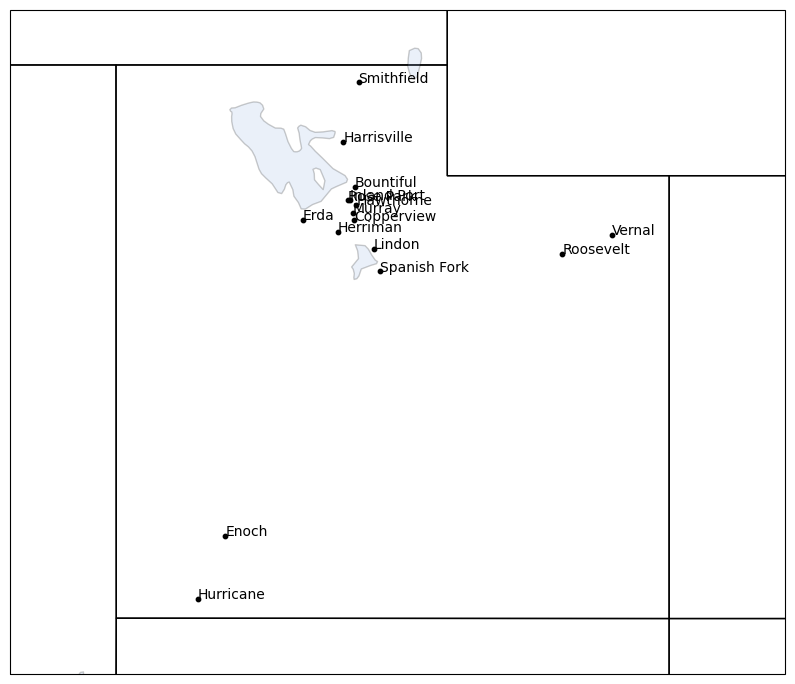

In [25]:
#plot locations in Utah
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(1,1,1, projection=crs.PlateCarree())
ax.set_extent([-115,-108,36.5,42.5],crs=crs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k')
ax.add_feature(cfeature.LAKES.with_scale('50m'), edgecolor='k',alpha=0.2)
ax.scatter(sites['Lon'],sites['Lat'],marker='o',s=10,c='k')
ID = sites.index.values
for i, id in enumerate(ID): 
    ax.annotate(id, (sites['Lon'][i],sites['Lat'][i]))
plt.savefig('locations_utah.png')

In [26]:
#now take advantage of pandas to "pivot" to split up the data by NAME
#that puts every Time as a column, that is really ugly
aqu=aq_utah.pivot_table(values="PM2.5", index=["STN"],columns="Time")
aqu.index = sites.index
display(aqu)

Time          2020-01-01 07:00:00  2020-01-01 08:00:00  2020-01-01 09:00:00  \
Smithfield                  20.90                22.70                 19.4   
Bountiful                   16.80                18.50                 19.3   
Roosevelt                    7.50                 8.10                  5.3   
Enoch                       10.50                11.10                 12.4   
Copperview                  16.90                15.90                 16.7   
Hawthorne                   16.40                16.50                 16.4   
Inland Port                  8.15                 7.25                  7.4   
Herriman                     5.40                 5.60                  5.9   
Rose Park                   18.50                17.50                 20.3   
Murray                       3.40                 3.90                  5.6   
Erda                        26.80                24.30                 22.4   
Vernal                      16.80                16.70                 18.1   
Lindon                      11.80                 9.90                 11.7   
Spanish Fork                 7.20                 7.20                  5.3   
Hurricane                   27.40                28.60                 30.3   
Harrisville                 17.60                23.30                 21.0   

Time          2020-01-01 10:00:00  2020-01-01 11:00:00  2020-01-01 12:00:00  \
Smithfield                  20.80                19.30                 13.5   
Bountiful                   18.00                16.80                 18.3   
Roosevelt                    5.10                 9.50                  9.1   
Enoch                       10.80                10.90                 13.2   
Copperview                  17.05                12.85                  9.9   
Hawthorne                   17.30                12.40                  8.2   
Inland Port                  5.65                 3.55                  3.0   
Herriman                     6.30                 4.80                  3.7   
Rose Park                   15.80                14.00                 14.7   
Murray                       5.70                 6.50                  7.0   
Erda                        22.80                24.90                 22.7   
Vernal                      13.80                 8.80                 10.0   
Lindon                       8.00                10.60                 11.9   
Spanish Fork                 3.90                 4.70                  8.0   
Hurricane                   26.40                24.20                 26.3   
Harrisville                 18.80                12.90                  9.9   

Time          2020-01-01 13:00:00  2020-01-01 14:00:00  2020-01-01 15:00:00  \
Smithfield                   7.50                  7.6                 8.70   
Bountiful                   16.80                 19.8                19.70   
Roosevelt                    6.00                  5.1                 5.30   
Enoch                       11.20                  5.6                10.70   
Copperview                   9.55                 10.7                11.85   
Hawthorne                    8.80                 10.6                 9.70   
Inland Port                  3.15                  4.9                 5.20   
Herriman                     3.70                  4.5                 4.20   
Rose Park                   15.50                 13.4                12.30   
Murray                       7.20                  7.3                 7.50   
Erda                        22.90                 23.5                26.30   
Vernal                       9.10                  2.3                 3.30   
Lindon                       8.90                  7.6                 5.50   
Spanish Fork                 3.50                  3.6                 7.50   
Hurricane                   26.40                 20.3                24.10   
Harrisville                 10.40               

In [27]:
#4a now use the transpose function so that the times are rows and
#each column is a station 
#and display the data in this format

aqu = aqu.transpose()
display(aqu)
display(aqu.count())

Smithfield  Bountiful  Roosevelt  Enoch  Copperview  \
Time                                                                       
2020-01-01 07:00:00        20.9      16.80        7.5   10.5       16.90   
2020-01-01 08:00:00        22.7      18.50        8.1   11.1       15.90   
2020-01-01 09:00:00        19.4      19.30        5.3   12.4       16.70   
2020-01-01 10:00:00        20.8      18.00        5.1   10.8       17.05   
2020-01-01 11:00:00        19.3      16.80        9.5   10.9       12.85   
...                         ...        ...        ...    ...         ...   
2021-01-01 02:00:00        19.6       6.15        5.3   18.9       15.20   
2021-01-01 03:00:00        22.5       6.55        6.3   20.3       13.60   
2021-01-01 04:00:00        24.0       8.25        6.3   19.3       12.30   
2021-01-01 05:00:00        22.6       9.50        5.5   18.0       17.30   
2021-01-01 06:00:00        24.8      11.35        5.4   19.2       15.00   

                     Hawthorne  Inland Port  Herriman  Rose Park  Murray  \
Time                                                                       
2020-01-01 07:00:00       16.4         8.15       5.4       18.5     3.4   
2020-01-01 08:00:00       16.5         7.25       5.6       17.5     3.9   
2020-01-01 09:00:00       16.4         7.40       5.9       20.3     5.6   
2020-01-01 10:00:00       17.3         5.65       6.3       15.8     5.7   
2020-01-01 11:00:00       12.4         3.55       4.8       14.0     6.5   
...                        ...          ...       ...        ...     ...   
2021-01-01 02:00:00       13.3        13.20       NaN       17.1    20.7   
2021-01-01 03:00:00       13.7        10.75       NaN       17.1    20.7   
2021-01-01 04:00:00       16.6        13.30       NaN       14.6    24.8   
2021-01-01 05:00:00       14.2        14.15       NaN       17.2    27.7   
2021-01-01 06:00:00       18.7         8.10       NaN       18.8    28.5   

                     Erda  Vernal  Lindon  Spanish Fork  Hurricane  \
Time                                                                 
2020-01-01 07:00:00  26.8    16.8    11.8           7.2      27.40   
2020-01-01 08:00:00  24.3    16.7     9.9           7.2      28.60   
2020-01-01 09:00:00  22.4    18.1    11.7           5.3      30.30   
2020-01-01 10:00:00  22.8    13.8     8.0           3.9      26.40   
2020-01-01 11:00:00  24.9     8.8    10.6           4.7      24.20   
...                   ...     ...     ...           ...        ...   
2021-01-01 02:00:00  14.6    24.1    18.7           1.2      36.85   
2021-01-01 03:00:00  12.0    25.0    17.6           1.6      38.45   
2021-01-01 04:00:00  12.5    27.6    19.9           1.6      43.75   
2021-01-01 05:00:00  15.7    30.9    21.0           2.0      40.70   
2021-01-01 06:00:00  12.4    28.9    20.5           1.8      43.20   

                     Harrisville  
Time                              
2020-01-01 07:00:00         17.6  
2020-01-01 08:00:00         23.3  
2020-01-01 09:00:00         21.0  
2020-01-01 10:00:00         18.8  
2020-01-01 11:00:00         12.9  
...                          ...  
2021-01-01 02:00:00         20.1  
2021-01-01 03:00:00         20.4  
2021-01-01 04:00:00         22.5  
2021-01-01 05:00:00         26.3  
2021-01-01 06:00:00         32.5  

[8784 rows x 16 columns]

Smithfield      8757
Bountiful       8770
Roosevelt       8766
Enoch           8698
Copperview      8755
Hawthorne       8630
Inland Port     8735
Herriman        4348
Rose Park       8595
Murray          8558
Erda            8581
Vernal          8319
Lindon          8724
Spanish Fork    8564
Hurricane       8756
Harrisville     8545
dtype: int64

In [28]:
#4b to confirm, list and print the column names 
aqu_columns = list(aqu.columns)
print(aqu_columns)

#4c to confirm, print the index values for the dataframe aqu
# the first two rows should look like
#DatetimeIndex(['2020-01-01 07:00:00', '2020-01-01 08:00:00',
#               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
print(aqu.index)


['Smithfield', 'Bountiful', 'Roosevelt', 'Enoch', 'Copperview', 'Hawthorne', 'Inland Port', 'Herriman', 'Rose Park', 'Murray', 'Erda', 'Vernal', 'Lindon', 'Spanish Fork', 'Hurricane', 'Harrisville']
DatetimeIndex(['2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               '2020-01-01 11:00:00', '2020-01-01 12:00:00',
               '2020-01-01 13:00:00', '2020-01-01 14:00:00',
               '2020-01-01 15:00:00', '2020-01-01 16:00:00',
               ...
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00',
               '2021-01-01 01:00:00', '2021-01-01 02:00:00',
               '2021-01-01 03:00:00', '2021-01-01 04:00:00',
               '2021-01-01 05:00:00', '2021-01-01 06:00:00'],
              dtype='datetime64[ns]', name='Time', length=8784, freq=None)


In [29]:
#4d save the dataframe aqu to a csv file  named aq_utah_2020.csv
# with the name in your current directory
#use the function "to_csv"
#this is a very important step for research
#to be able to bypass having to do all of the
#preprocessing steps above
aqu.to_csv('aq_utah_2020.csv',index=True)

#4e save the dataframe "sites" to a csv file named sites.cv. 

sites.to_csv('sites.csv',index=True)

aqu.dtypes

Smithfield      float64
Bountiful       float64
Roosevelt       float64
Enoch           float64
Copperview      float64
Hawthorne       float64
Inland Port     float64
Herriman        float64
Rose Park       float64
Murray          float64
Erda            float64
Vernal          float64
Lindon          float64
Spanish Fork    float64
Hurricane       float64
Harrisville     float64
dtype: object

In [30]:
#use the pandas describe function to obtain and display a variable "basic_vals"
#that includes the 1st, median, and 99th percentile along with other default parameters

#4f
basic_vals = aqu.describe(percentiles=[.01,.50,.99])
display(basic_vals)

Smithfield    Bountiful    Roosevelt        Enoch   Copperview  \
count  8757.000000  8770.000000  8766.000000  8698.000000  8755.000000   
mean      9.239306     7.269869     5.432010     9.305875     7.282947   
std       9.528598     7.162597     4.515969     9.828477     6.379639   
min       0.000000     0.200000    -1.500000     0.100000    -4.800000   
1%        0.600000     0.600000     0.500000     0.900000     0.900000   
50%       6.300000     5.000000     4.300000     6.700000     5.350000   
99%      47.088000    33.415500    23.235000    38.900000    32.596000   
max     133.200000    90.050000    76.700000   289.200000    58.550000   

         Hawthorne  Inland Port     Herriman    Rose Park       Murray  \
count  8630.000000  8735.000000  4348.000000  8595.000000  8558.000000   
mean      9.071680     6.214161     4.329358    10.395753     7.156275   
std       8.616716     6.442911     2.902834    10.302563     8.680474   
min      -8.400000    -0.550000     0.200000     0.400000    -8.600000   
1%        0.600000     0.300000     0.400000     1.100000     0.100000   
50%       6.700000     4.350000     3.800000     8.000000     4.700000   
99%      37.900000    32.382000    14.476500    38.824000    44.529000   
max     215.100000    64.800000    30.300000   325.300000   107.000000   

              Erda       Vernal       Lindon  Spanish Fork    Hurricane  \
count  8581.000000  8319.000000  8724.000000   8564.000000  8756.000000   
mean      6.629798     7.844308     7.490509      5.893671     8.560045   
std       6.676434     7.295210     6.936232      4.706236     8.897115   
min      -0.200000     0.100000     0.200000     -2.900000     0.000000   
1%        0.300000     0.800000     0.700000      0.563000     0.550000   
50%       4.300000     6.000000     5.500000      4.800000     6.000000   
99%      31.320000    33.600000    32.377000     22.937000    43.145000   
max      70.500000   165.000000   108.900000     59.200000   112.400000   

       Harrisville  
count  8545.000000  
mean      6.870205  
std       6.857863  
min      -8.900000  
1%        0.400000  
50%       4.900000  
99%      35.612000  
max      71.100000